In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import get_data

In [32]:
df = pd.read_sql_query('SELECT datadate,gvkey,tic,cusip,dlttq,lseq,seqq,ltq FROM quarterly',get_data.engine)
#dlttq: total long term debt, 
#lseq: 
#ltq: Liabilities (Total)
df.head()
# Debt to equity ratio = dlttq / seqq

,datadate,gvkey,tic,cusip,dlttq,lseq,seqq,ltq
0,2013-06-30,028967,QCRH,74727A104,392.804,2446.771,145.446,2301.325
1,2013-09-30,028967,QCRH,74727A104,388.253,2485.714,147.953,2337.761
2,2013-12-31,028967,QCRH,74727A104,338.238,2394.953,147.577,2247.376
3,2014-03-31,028967,QCRH,74727A104,418.274,2426.319,141.357,2284.962
4,2014-06-30,028967,QCRH,74727A104,414.709,2464.839,134.643,2330.196


In [33]:
df['debt_to_equity'] = df['dlttq'] / df['seqq']
df.head()

,datadate,gvkey,tic,cusip,dlttq,lseq,seqq,ltq,debt_to_equity
0,2013-06-30,028967,QCRH,74727A104,392.804,2446.771,145.446,2301.325,2.700686
1,2013-09-30,028967,QCRH,74727A104,388.253,2485.714,147.953,2337.761,2.624164
2,2013-12-31,028967,QCRH,74727A104,338.238,2394.953,147.577,2247.376,2.291943
3,2014-03-31,028967,QCRH,74727A104,418.274,2426.319,141.357,2284.962,2.958990
4,2014-06-30,028967,QCRH,74727A104,414.709,2464.839,134.643,2330.196,3.080064


inf -12316.5


<AxesSubplot:ylabel='Frequency'>

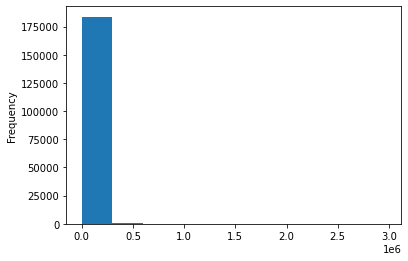

In [34]:
print(max(df['debt_to_equity']), min(df['debt_to_equity']))
df['ltq'].plot(kind='hist')

4615.695451040863 1.3351776587392717e-06


<AxesSubplot:ylabel='Frequency'>

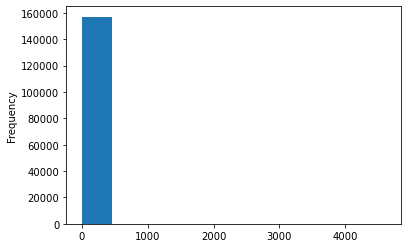

In [35]:
# Filter out rows with negative values in dlttq, seqq, or 0
filtered_df = df[(df['dlttq'] > 0) & (df['seqq'] > 0)]
filtered_df.head()
print(max(filtered_df['debt_to_equity']), min(filtered_df['debt_to_equity']))
filtered_df['debt_to_equity'].plot(kind='hist')

968.3087761674718 1.3351776587392717e-06


,datadate,gvkey,tic,cusip,dlttq,lseq,seqq,ltq,debt_to_equity
194942,2012-06-30,028967,QCRH,74727A104,378.071,2043.426,136.907,1904.104,2.761517
194943,2012-09-30,028967,QCRH,74727A104,370.673,2023.946,138.975,1884.825,2.667192
194944,2012-12-31,028967,QCRH,74727A104,347.075,2093.730,140.434,1953.296,2.471446
194945,2013-03-31,028967,QCRH,74727A104,379.677,2143.991,142.198,2001.793,2.670059
194946,2001-12-31,029359,SUI,866674104,477.598,994.449,329.641,521.810,1.448843


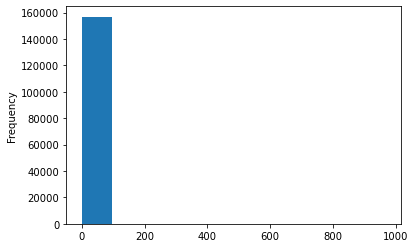

In [38]:
# truncating the ratio to only include rows under 100 (realistically we probably want an even lower ratio)
filtered_df = filtered_df[(filtered_df['debt_to_equity'] < 1000)]
print(max(filtered_df['debt_to_equity']), min(filtered_df['debt_to_equity']))
filtered_df['debt_to_equity'].plot(kind='hist')
filtered_df.tail()

In [42]:
# Round the values to the first 2 decimal points before comparison
unequal_rows = filtered_df[((filtered_df['lseq'] - filtered_df['ltq']).round(2)) != filtered_df['seqq'].round(2)]

# Display the rows where the condition is not met
print(unequal_rows)

          datadate   gvkey   tic      cusip     dlttq      lseq      seqq  \
43      2000-03-31  029099   REG  758849103  1038.702  2657.794  1232.926   
44      2000-06-30  029099   REG  758849103  1078.634  2761.975  1230.415   
45      2000-09-30  029099   REG  758849103  1199.733  2893.064  1227.951   
46      2000-12-31  029099   REG  758849103  1233.983  3035.144  1225.415   
47      2001-03-31  029099   REG  758849103  1272.606  2981.538  1222.423   
...            ...     ...   ...        ...       ...       ...       ...   
194940  2011-12-31  028967  QCRH  74727A104   358.067  1966.610   142.381   
194941  2012-03-31  028967  QCRH  74727A104   376.070  1992.998   143.551   
194942  2012-06-30  028967  QCRH  74727A104   378.071  2043.426   136.907   
194943  2012-09-30  028967  QCRH  74727A104   370.673  2023.946   138.975   
194946  2001-12-31  029359   SUI  866674104   477.598   994.449   329.641   

             ltq  debt_to_equity  
43      1087.204        0.842469  
44   